# Introductory data exploration with Python 

### We have a dataset looking at 79 explanatory variables which observe different aspects of residential homes in Ames, Iowa. 

We want to look at how we can select and manipulate specific features to create a set of variables which would be suitable for use in creating a model to predict house prices. 

We will do this by conducting some basic analysis, some cleaning and some manipulation of variables.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking at some features we believe may be correlated with Sale Price:

In [4]:
df_train.info()               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

LotArea, YearBuilt, TotalBsmtSF, GarageArea, YrSold, GrLivArea, OverallQual and FullBath are some features we selected for our initial analysis. The selection was personal and I looked at the set of features from my own perspective, as if I was buying a property my self.

I want to look at the features which influence the size of the property, from my subset of features I see that LotArea, TotalBsmtSF, GarageArea and GrLivArea all account for sizes across the property. From my experience, larger residential properties tend to be more expensive than smaller ones, we will examine this hypothesis.

Size features: 'SalePrice', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea'

In [48]:
size_tab = df_train[['SalePrice', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'GrLivArea']].sort_values(by = 'SalePrice', ascending = False)
size_tab

,SalePrice,LotArea,TotalBsmtSF,GarageArea,GrLivArea
691,13.534473,21535,7.801391,832,8.370084
1182,13.521139,15623,7.781556,813,8.406485
1169,13.345507,35760,7.565275,807,8.196161
898,13.323927,12919,7.753624,820,7.768110
803,13.275828,13891,7.458186,1020,7.945201
...,...,...,...,...,...
30,10.596635,8500,6.475433,250,7.183112
533,10.578980,5000,0.000000,0,5.811141
968,10.542706,5925,6.396930,0,6.875232
916,10.471950,9000,6.173786,308,6.173786


From an initial glance at the above table, we see that the properties with the highest price are far larger than those with the lowest prices. We should compare this with some descriptive statistics to gain some more insight:

In [46]:
size_dict = {}
for i in size_tab:
    if i not in size_dict:
        size_dict[i] = i
for i in size_dict:
    size_dict[i] = int(size_tab[i].mean())

print('Mean value for each category: ' + str(size_dict))

Mean value for each category: {'SalePrice': 180921, 'LotArea': 10516, 'TotalBsmtSF': 1057, 'GarageArea': 472, 'GrLivArea': 1515}


Comparing the top row of our data with the mean values for each feature, we see that the top value for each feature is several times higher than the set of mean values. Now we know that our initial hypothesis regarding property size is correct, we can use scatter plots to visualise it:

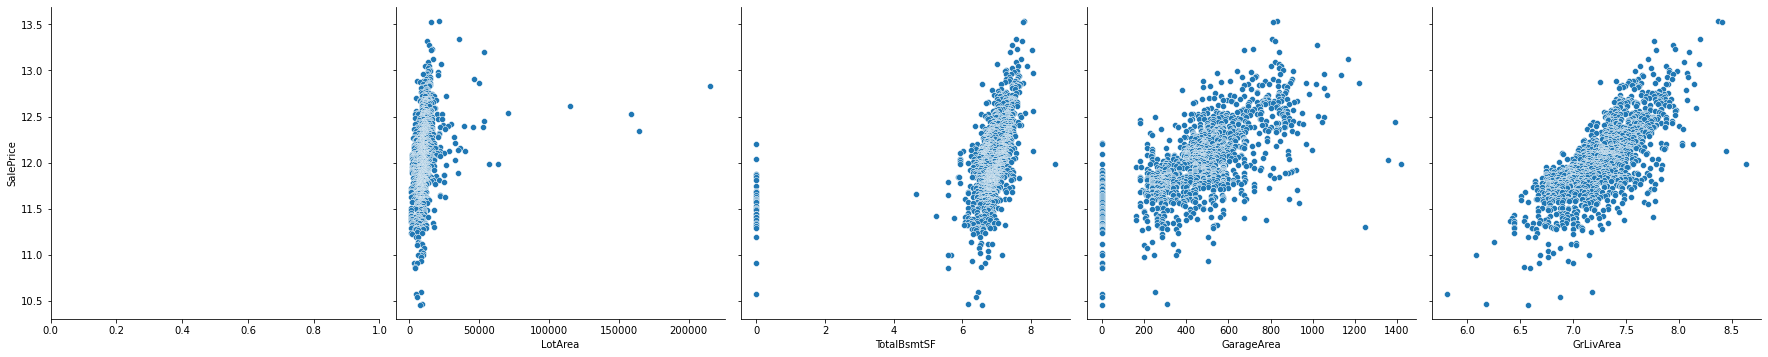

In [49]:
fig = sns.pairplot(size_tab, x_vars = ['','LotArea','TotalBsmtSF', 'GarageArea', 'GrLivArea'], y_vars = 'SalePrice', palette='coolwarm', height = 5)

Looking at this grid of scatterplots, we see that the data does show some slight relationship between each of the observed features and the Sale Price, however, we also note that each feature has several outliers which is limiting our ability to make understand the plots. For instance, in Lot Area, most of our points are almost vertical due to the size of our x axis, by removing outliers e.g. any Lot Area > 75000, we will better understand what is happening. 

We will now look at the categorical variables we chose - FullBath, YearBuilt and OverallQual.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

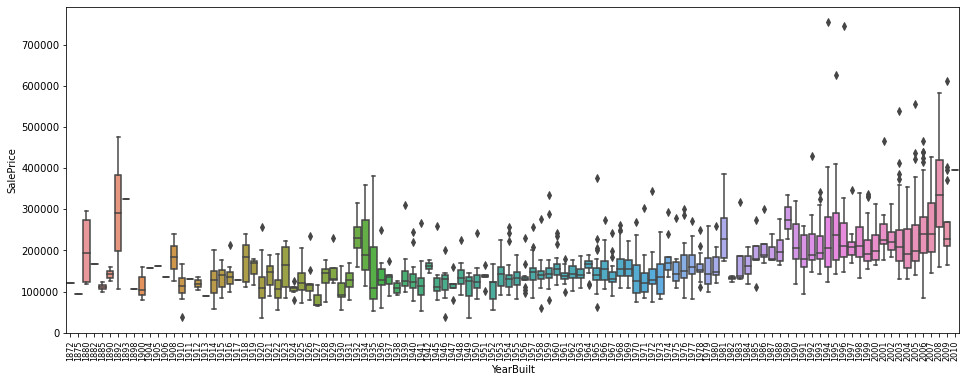

In [8]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
fig, axes = plt.subplots(figsize = (16,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)
plt.xticks(rotation = 90, fontsize = 8)

Looking at the year a property was built, it seems that over time i.e the newer a property is, the more expensive it is. We should note that we are unsure if the data accounts for inflation over time or not. If it does, then we see that newer properties are more expensive bar a few years e.g. 1892 (may be an antique residence). We will use similar plots to observe FullBath and OverallQual.

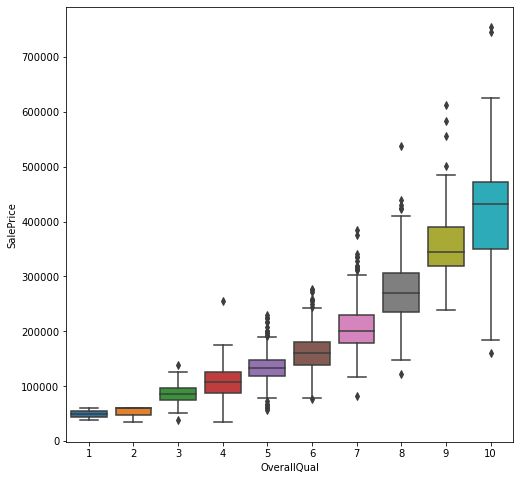

In [9]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
fig, ax = plt.subplots(figsize = (8, 8))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)

With OverallQual we see a clear relationship between the score given to a property and its price, those scoring higher on this feature have a higher SalePrice in general.

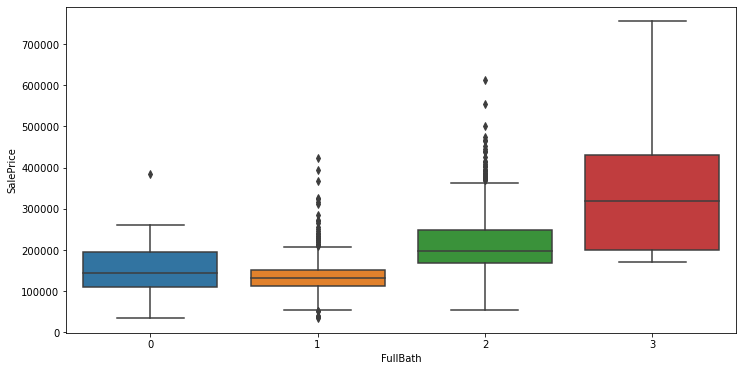

In [10]:
var = 'FullBath'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)

If we exclude FullBath = 0, it seems that as the number of bath's increases, so does the houseprice. If this is the case then why does 0 seem to have a higher mean SalePrice than 1?
A quick google search tells us that a full bath consists of a bathtub, shower, toilet and sink. A half bath will consist of only two of these, likely a shower and a sink, with the toilet in another room. So properties without a full bath will probably have a halfbath.

Houses with half baths may be apartments in more urban areas and may be more expensive than properties with only one full bath. To further explore this we would have to look at half baths and the basment bathroom categories. We can quickly check the relationship of half bath.

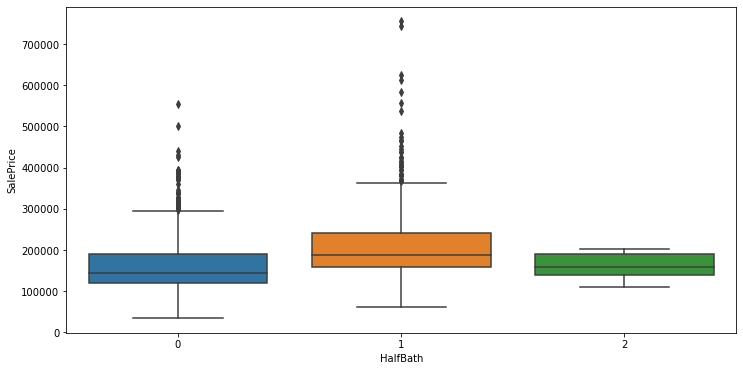

In [11]:
var = 'HalfBath'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
fig, ax = plt.subplots(figsize = (12,6))
fig = sns.boxplot(x = var, y = 'SalePrice', data = data)

Here we see that properties with halfbath tend to be pricier than those without, the reason we gave above may explain this but we can not be completely sure, so for now we will move on and clean our data of outliers in order to better predict outcomes.

Let us look at which features have missing data and null values:

In [12]:
total = df_train.isnull().sum().sort_values(ascending = False)
percentage = df_train.isnull().sum()/df_train.isnull().count().sort_values(ascending = False)

In [13]:
missing = pd.concat([total, percentage], axis = 1, keys = ['total', 'percentage'], sort = True)

In [14]:
missing.sort_values(by = 'total',ascending = False)

,total,percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
HouseStyle,0,0.000000
Id,0,0.000000
KitchenAbvGr,0,0.000000
KitchenQual,0,0.000000


Dropping the columns with missing information:

In [15]:
df_train = df_train.drop((missing[missing['total'] >1]).index, 1)

In [16]:
df_train.isnull().count().head(20)
df_train.loc[df_train['Electrical'].isnull()].index

Int64Index([1379], dtype='int64')

In [17]:
df_train[df_train['Id'] == 1379].isnull().sum().max()

0

We note that after dropping all columns with >1 null value, only 'Electrical' has a null value. We found the index of the null value and wil drop it.

In [18]:
df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
df_train.sum().isnull().max()

False

Now that we have removed nulls, we can look at the features which are most correlated with SalePrice and create a heatmap:


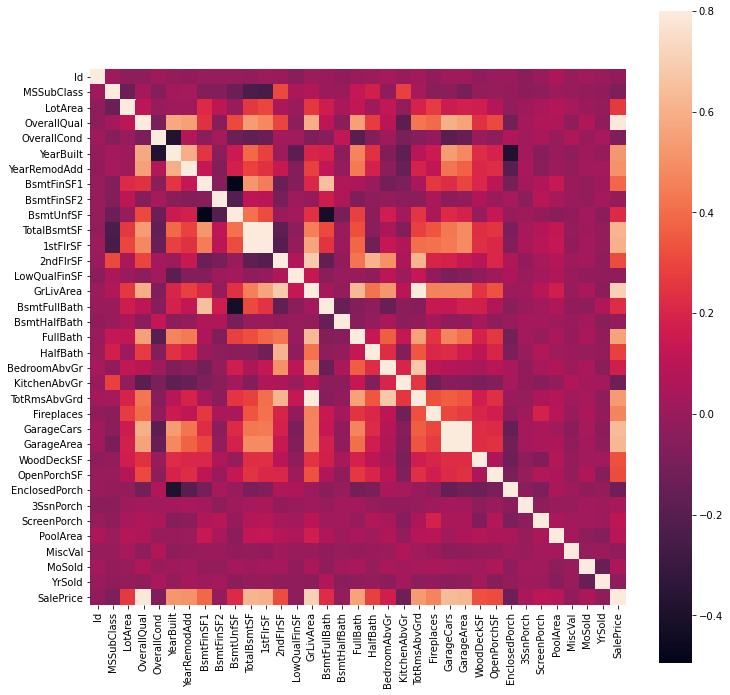

In [20]:
corrmat = df_train.corr()
fig, ax = plt.subplots(figsize = (12,12))
fig = sns.heatmap(data = corrmat, vmax = .8, square = True)

Above, we look at SalePrice, the light coloured boxes have greater correlation. Like previous, we note that some variables are similar (e.g. GarageCars, GarageArea) so we will take the most correlated of the two). Now we look at the top 10 most correlated variables:

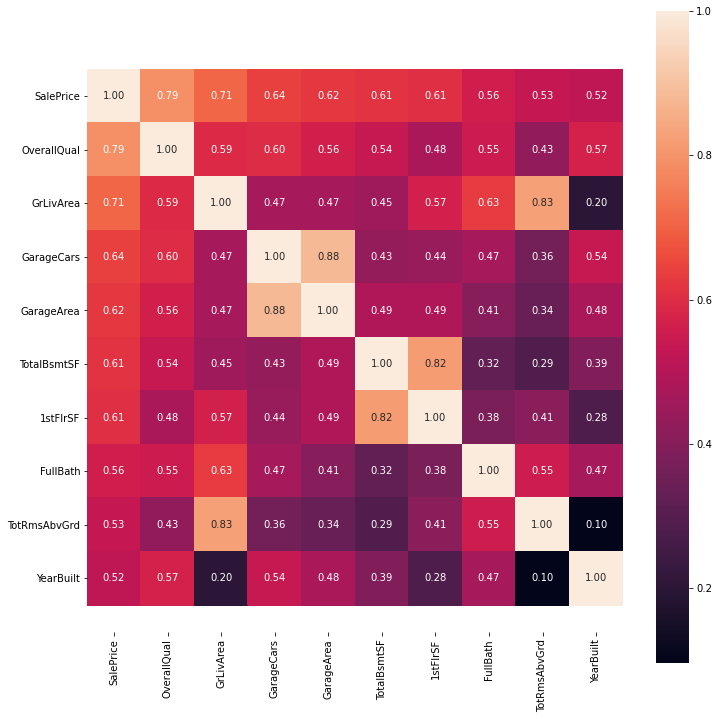

In [21]:
fig, ax = plt.subplots(figsize = (12,12))
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Now that we have constructed the heatmap above we can decide on which of these most correlated variables we can drop. Like we previously noted, GarageCars and GarageArea seem to be almost identical - not surprising, the number of cars you fit in a garage is proportionate to the size of the garage itself. We don't want to identical variables, it may cause overfitting in our model so we will frop GarageArea since it is the less correlated of the two. We also see that TotalBsmtSF, 1stFlorSF and TotRmsAbvGrd are unsurprisingly similar, we will keep TotalBsmtSF.

Now, our list of variables to further analyse is: 'SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt'.

We can move onto spotting outliers in our data. First we should try to find outliers in SalePrice. To do so, we will standardise the data and look at the data points on either tail.

In [22]:
saleprice_scale = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])

In [23]:
low_range = saleprice_scale[saleprice_scale[:,0].argsort()][:10]
low_range

array([[-1.83870376],
       [-1.83352844],
       [-1.80092766],
       [-1.78329881],
       [-1.77448439],
       [-1.62337999],
       [-1.61708398],
       [-1.58560389],
       [-1.58560389],
       [-1.5731    ]])

In [24]:
high_range= saleprice_scale[saleprice_scale[:,0].argsort()][-10:]
high_range

array([[3.82897043],
       [4.04098249],
       [4.49634819],
       [4.71041276],
       [4.73032076],
       [5.06214602],
       [5.42383959],
       [5.59185509],
       [7.10289909],
       [7.22881942]])

Lower range values seem fairly consistent, higher range values however seem widely distributed.

Let us observe some of our variables with a quick scatter plot:

Observing GrLivArea:

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

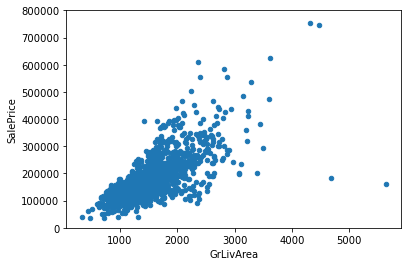

In [25]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var , y = 'SalePrice', ylim = (0,800000))

Looking at our plot here, we have some data points we should watch out for. The two values at high GrLivArea seem to be outliers, they are away from the general trend and stand alone. We have two values at a high saleprice too, but since these follow the general trend of the rest of our points we will keep them.

In [26]:
df_train[['SalePrice', 'GrLivArea']].sort_values(by = 'GrLivArea' ,ascending = False)

,SalePrice,GrLivArea
1298,160000,5642
523,184750,4676
1182,745000,4476
691,755000,4316
1169,625000,3627
...,...,...
528,86000,605
29,68500,520
916,35311,480
1100,60000,438


The points in GrLivArea with Id's 1298 and 523 are the items we deemed outliers so we will drop them.

In [27]:
df_train = df_train.drop(df_train[df_train['Id'] == 1298].index)
df_train = df_train.drop(df_train[df_train['Id'] == 523].index)

Observing TotalBsmtSF:

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

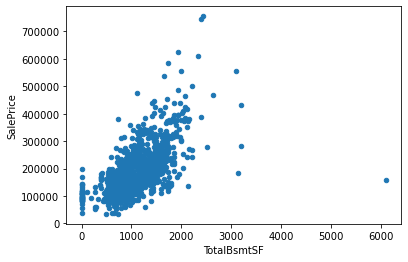

In [28]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

The main thing to note her is the straight line of points where TotalBsmtSF = 0. We will check if this has any effect on our data and if so, deal with it in the next section.

Now we want to check if our variables meet the statistical basis for multivariate analysis. We do his by observing the four statistical assumptions:

1. Normality
2. Homoscedasticity
3. Linearly Distributed
4. No correlated errors

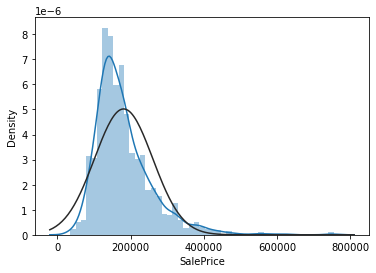

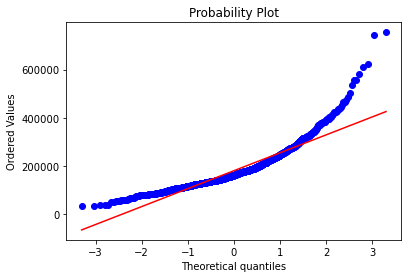

In [29]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

We note that our data does not fit the normal distribution, we have skew toward the right tail of our plot. We can remove positive skew by using a log transform to normalise our datapoints.

In [30]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

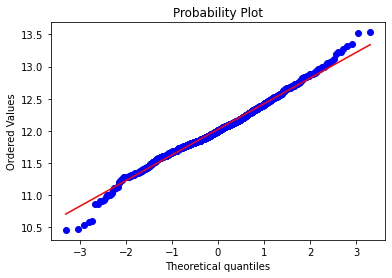

In [31]:
res = stats.probplot(df_train['SalePrice'], plot = plt)

Now we see that the data for out SalePrice looks far better. We will continue to do this with the rest of our features:

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 334,  438,  480, ..., 4476, 4676, 5642], dtype=int64)),
 (506.9057246730721, 1515.6659807956105, 0.9626590385785293))

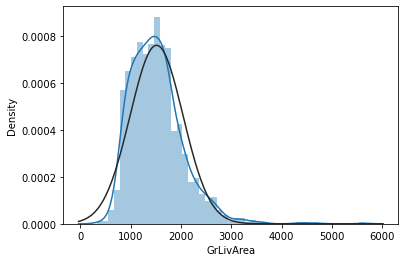

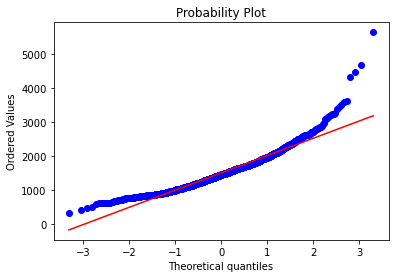

In [32]:
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
stats.probplot(df_train['GrLivArea'], plot = plt)

Once again we seem to have positive skew so we take a log transformation:

In [33]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

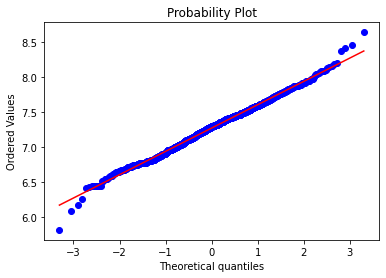

In [34]:
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Lets keep going through or features:

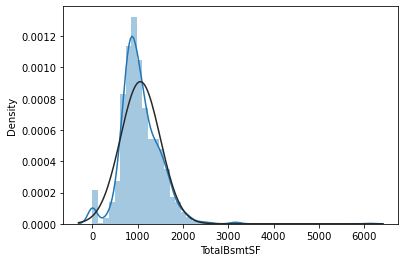

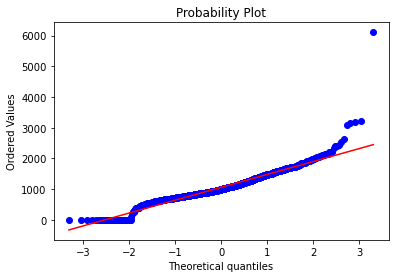

In [35]:
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Here we have an issue, while we do have positive skew and would therefore like to take a log transformation, many of our datapoints have a value of 0 which prevents us from doing so. 
How can we deal with this?

We can create a dummy variable which = 1 if we have a basement and 0 if we dont have a basement and then do a log transform of the properties which do have basements to prevent the TotalBsmtSF = 0 from affecting our work.

In [36]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)

#Create a column using pd.Series the same size of TotalBsmtSF


In [37]:
df_train['HasBsmt'] = 0 

#Set initial value of items in the column to 0

In [38]:
df_train['HasBsmt']

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: HasBsmt, Length: 1458, dtype: int64

In [39]:
df_train.loc[df_train['TotalBsmtSF']>0, 'HasBsmt'] = 1

# Locate items where TotalBsmtSF > 0 , set these values to have HasBsmt = 1

In [40]:
#take a log transform of the datapoints in TotalBsmtSF if HasBsmt = 1

df_train.loc[df_train['HasBsmt']==1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

I can use numpy.log1p() which adds 1 to each value in the dataset as a workaround when we have zeros preventing us from normalising the data at hand.

((array([-3.2975455 , -3.0397886 , -2.89641401, ...,  2.89641401,
          3.0397886 ,  3.2975455 ]),
  array([4.65396035, 5.24702407, 5.5759491 , ..., 8.07090609, 8.07277933,
         8.71768205])),
 (0.3583686847694624, 6.9254773525425914, 0.9904314406910203))

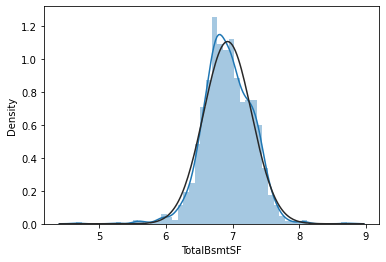

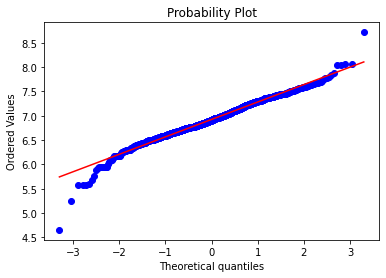

In [41]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


Now we will test the homoskedasticity of our variables by visualising them using a scatter plot:

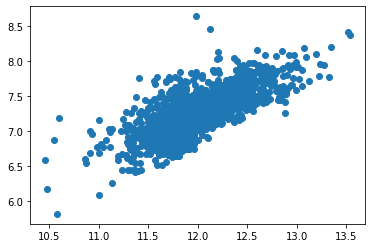

In [42]:
plt.scatter(df_train['SalePrice'], df_train['GrLivArea'])

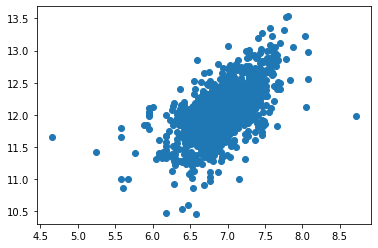

In [43]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0 ]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

We see that with both of our variables here, we dont have the conical shape they did prior to normalisation. This shows that our error term is constant across all variables so we can begin using these variables to build a model to predict SalePrice.

So, looking at what we have accomplished:

    - We have analysed Sale Price alone
    - We have observed the variables most correlated with Sale Price
    - We cleaned our data, getting rid of outliers and missing data
    - We tested the assumptions of normality on our chosen variables
    - We created dummy variables when needed
    
Using what we could, we found a set of features we decided were most important and observed two of them. Following similar procedures to other features, we would be able to build a machine learning model to predict Sale Prices for properties in the city. 